In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sbn
%matplotlib inline

df = pd.read_csv("master.csv")

In [2]:
del df['country-year']
del df['HDI for year']
del df['generation']
del df['suicides_no']
del df['age']
del df['sex']
del df['country']
del df['year']
del df[' gdp_for_year ($) ']
del df['gdp_per_capita ($)']

In [4]:
df.describe()

,population,suicides/100k pop
count,2.782000e+04,27820.000000
mean,1.844794e+06,12.816097
std,3.911779e+06,18.961511
min,2.780000e+02,0.000000
25%,9.749850e+04,0.920000
50%,4.301500e+05,5.990000
75%,1.486143e+06,16.620000
max,4.380521e+07,224.970000


In [5]:
population = df.loc[:, 'population']
suicides = df.loc[:, 'suicides/100k pop']

In [6]:
from sklearn import preprocessing
x = preprocessing.scale(population)
x = x.reshape(-1,1)
y = preprocessing.scale(suicides)
y = y.reshape(-1,1)
x_normalized = preprocessing.normalize(x, norm='l2')
y_normalized = preprocessing.normalize(y, norm='l2')
y = y.reshape(-1)
x = x.reshape(-1)

<AxesSubplot:xlabel='population', ylabel='suicides/100k pop'>

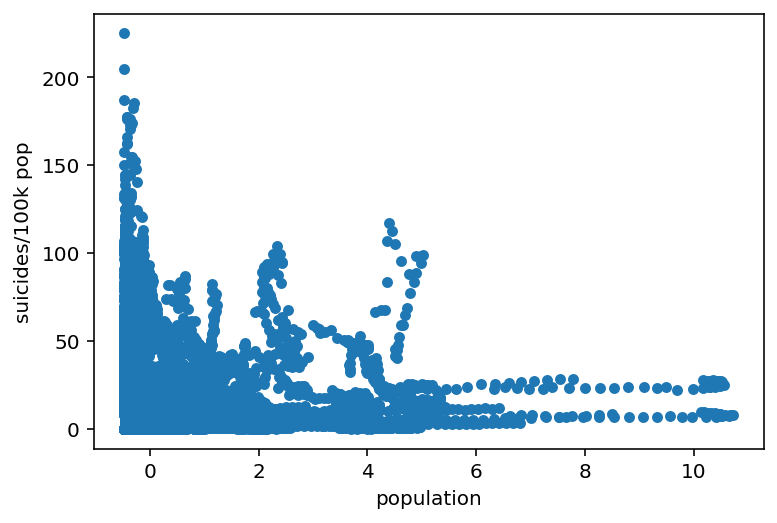

In [7]:
df['population'] = x
df['suicides/100kpop'] = y

df.plot(kind = 'scatter', x = "population", y = "suicides/100k pop")

In [8]:
df.describe()

,population,suicides/100k pop,suicides/100kpop
count,2.782000e+04,27820.000000,2.782000e+04
mean,-1.626076e-17,12.816097,-3.301373e-15
std,1.000018e+00,18.961511,1.000018e+00
min,-4.715370e-01,0.000000,-6.759128e-01
25%,-4.466833e-01,0.920000,-6.273926e-01
50%,-3.616434e-01,5.990000,-3.600040e-01
75%,-9.168636e-02,16.620000,2.006154e-01
max,1.072688e+01,224.970000,1.118886e+01


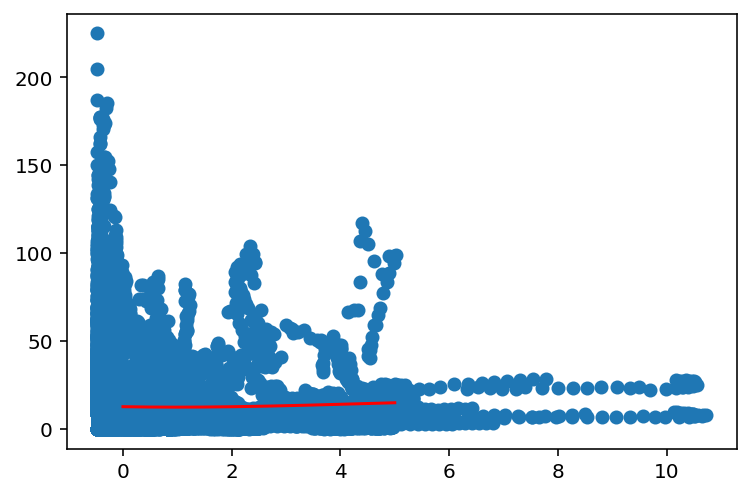

In [17]:
import numpy

x = df['population']
y = df['suicides/100k pop']

mymodel = numpy.poly1d(numpy.polyfit(x, y, 3))

myline = numpy.linspace(0,5,225)

plt.scatter(x,y)
plt.plot(myline, mymodel(myline), color='red')
plt.show()

In [18]:
from sklearn.metrics import r2_score
print(r2_score(y, mymodel(x)))

0.00031750958237775073


In [19]:
mymodel

poly1d([-0.02260487,  0.31169984, -0.54559714, 12.6051966 ])